___
# Ciência dos Dados - Projeto 3

___
## Nome 1 - Augusto Franco de Paula

## Nome 2 - Gabriel Heusi Pereira Bueno de Camargo

## Nome 3 - Pedro Henrique Carvalho Daher

___

___

## Introdução

   A partir de um interesse sobre carros, o grupo optou por fazer um modelo de previsão dos preços de carros e ainda analisar aqueles considerados "Overpriced", ou seja acima do preço considerado padrão para determinado modelo.
   
   A base de dados utilizada para o estudo é de 2017 e avalia apenas carros no território americano, dessa forma deve-se explorar esta afim de possibilitar tal modelo de predição. Para isso será importante avaliar quais as variáveis de maior influência sobre o preço de um carro para que ao fim haja uma comparação entre o preço real do carro e seu preço esperado a partir das variáveis que o definem. Por fim a análise de carros acima do preço servirá como dado de eficiência do estudo. 
   
   Dessa forma baseou-se em artigos cientificos e estudos que avaliam os modelos de distribuicão destes preços, entre eles estão: 

___
## Minerando dados e características do Dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import math
from sklearn.linear_model import Ridge, Lasso
from sys import stdin
from numpy import arange
import numpy as np
import seaborn as sns
from sklearn import preprocessing, cross_validation, neighbors

In [16]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
data = pd.read_csv('data.csv')

Esperamos trabalhar no diretório
C:\Users\Pedro Daher\Downloads


## Base de dados

In [17]:
data = shuffle(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2869,Bentley,Continental GT,2015,premium unleaded (required),521.0,8.0,AUTOMATIC,all wheel drive,2.0,"Exotic,Factory Tuner,Luxury,High-Performance",Midsize,Coupe,25,15,520,199700
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
6568,Mercedes-Benz,M-Class,2013,premium unleaded (required),402.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,20,14,617,58800
8621,Volkswagen,Routan,2011,regular unleaded,283.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,25,17,873,26930


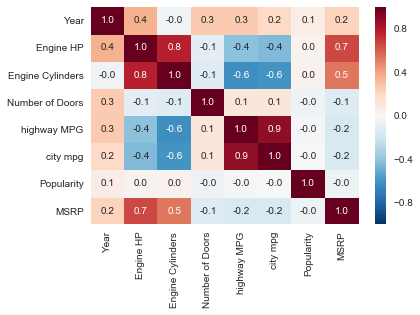

In [18]:
sns.heatmap(data.corr(), annot=True, fmt=".1f")
plt.show()

   A partir do mapa mostrado acima é possível identificar a influência (correlação) de uma variável sobre o preço de um carro. Dessa forma basta analisar e perceber que as três que apresentam maior proporcionalidade são: Ano de fabricação (Year), Potência do Motor (Engine HP) e número de cilindros (Engine Cylinders). Vale lembrar que isto era esperado, afinal essa ferramenta só é capaz de comparar dados quantitativos.

## Análise Descritiva

   A partir desta seção será reavaliada a ideia das variáveis e sua distribuição de acordo com o preço. Como por exemplo a "Engine Cylinders" será categorizado como uma espécie de força fornecida pelos cilindros ao carro e ainda observar onde a predominância do preço dos carros, separando em faixas de valor de compra/venda. 

In [19]:
data = data.loc[data['Engine Cylinders']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['MSRP']<125000,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['Engine HP']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data.columns=["Ano","Potência","Cilindros","Price"]
data.dropna()
data.head()

,Ano,Potência,Cilindros,Price
0,2011,335.0,6.0,46135
22,1993,172.0,6.0,2000
6568,2013,402.0,8.0,58800
8621,2011,283.0,6.0,26930
11294,2015,181.0,4.0,30515


In [20]:
faixa = range(5000,80000,3000)
price = pd.cut(data.Price, bins=faixa)
price.value_counts(sort=False, normalize=True)*100

(5000, 8000]       0.291545
(8000, 11000]      0.205161
(11000, 14000]     0.831444
(14000, 17000]     4.459562
(17000, 20000]     6.046863
(20000, 23000]     9.405032
(23000, 26000]    11.186697
(26000, 29000]    10.538819
(29000, 32000]    10.679192
(32000, 35000]     8.638376
(35000, 38000]     7.482993
(38000, 41000]     6.165641
(41000, 44000]     5.344995
(44000, 47000]     4.070835
(47000, 50000]     3.358169
(50000, 53000]     2.569917
(53000, 56000]     1.997624
(56000, 59000]     1.241767
(59000, 62000]     1.382140
(62000, 65000]     1.446928
(65000, 68000]     0.950221
(68000, 71000]     0.701868
(71000, 74000]     0.442717
(74000, 77000]     0.561494
Name: Price, dtype: float64

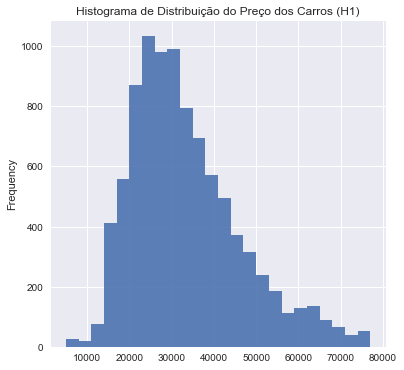

In [21]:
plot = data.Price.plot.hist(bins=faixa,title='Histograma de Distribuição do Preço dos Carros (H1)', figsize=(6, 6), alpha=0.9)
plt.show()

   Histograma que possibilita a visualização da distribuição dos preços dos carros de acordo com faixas de preço.

In [22]:
from sklearn.model_selection import train_test_split as split
train, test = split(data, test_size=0.3)
train.describe()

,Ano,Potência,Cilindros,Price
count,7914.000000,7914.000000,7914.000000,7914.000000
mean,2010.321203,237.238312,5.466136,31468.072656
std,7.674615,92.477992,1.475501,20601.795515
min,1990.000000,55.000000,3.000000,2000.000000
25%,2007.000000,170.000000,4.000000,20436.250000
50%,2015.000000,220.000000,6.000000,29272.500000
75%,2016.000000,291.000000,6.000000,40100.000000
max,2017.000000,707.000000,12.000000,124100.000000


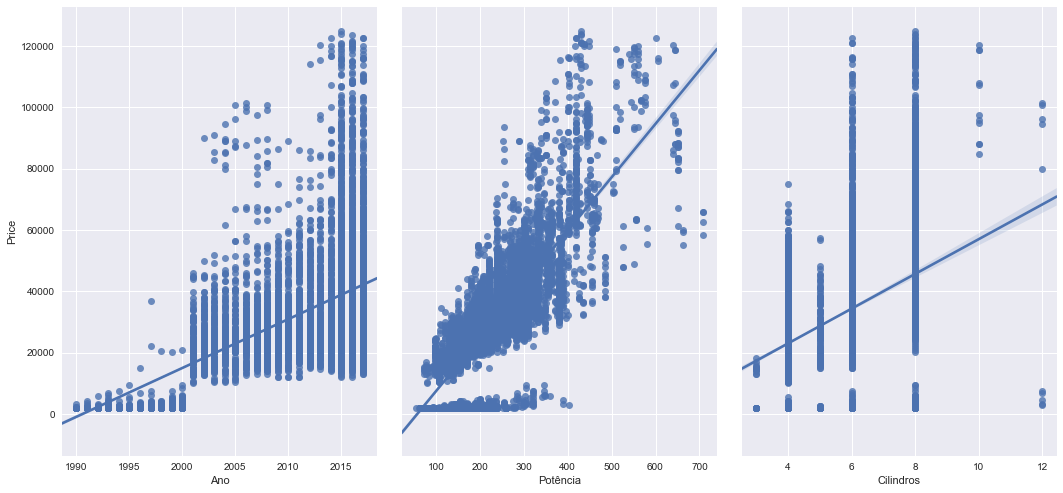

In [41]:
import seaborn as sns
%matplotlib inline
minhascolunas = ["Ano","Potência","Cilindros"]
h = sns.pairplot(train,x_vars=minhascolunas,y_vars="Price",size=7,aspect=0.7,kind = 'reg')
plt.show()

## Modelos de predição

   Sepração da base de dados em treino e teste, considerando que 30% do dataframe ('data') será selecionado aleatoriamente para teste e os outros 70% para treinamento

In [24]:
from sklearn.model_selection import train_test_split as split
train, test = split(data, test_size=0.3)
train.describe()

,Ano,Potência,Cilindros,Price
count,7914.000000,7914.000000,7914.000000,7914.000000
mean,2010.290245,237.534749,5.479151,31371.403083
std,7.686387,92.225237,1.462063,20453.263719
min,1990.000000,55.000000,3.000000,2000.000000
25%,2006.000000,170.000000,4.000000,20527.500000
50%,2015.000000,220.000000,6.000000,29292.500000
75%,2016.000000,292.000000,6.000000,40085.000000
max,2017.000000,707.000000,12.000000,124900.000000


## Modelo de predição pela média

O primeiro modelo de predição realizado foi pela média, que consiste basicamente na análise da média da variável que esperamos prever, no caso o preço dos carros. Para isso basta analisar a média de preços e essa será o valor esperado para o carro.

In [25]:
print('O preço esperado de um carro a partir da predição pela média é:',train.Price.mean())

O preço esperado de um carro a partir da predição pela média é: 31371.403083143796


### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [44]:
n = len(train)
fi = train.Price.mean()
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]

RSM1 = RSM(ybarra, fi, yi)[0]
R21 = R2(ybarra, fi, yi)[0]
print (R21)
print (RSM1)

0.0
20451.971458148175


In [45]:
n = len(test)
fi = test.Price.mean()
ybarra = test.Price.mean()
yi=test.Price

def R2teste (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSMteste (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]

R2teste1 = R2teste(ybarra, fi, yi)[0]
RSMteste1 = RSMteste(ybarra, fi, yi)[0]
print(R2teste1)
print(RSMteste1)

0.0
20828.53298821836


In [46]:
Qualidade = (RSM1)/(RSMteste1)
print('A qualidade deste modelo é de', Qualidade)
print('Neste modelo, R2train = R2test')
print('Não está "overfiting" pois RSMtrain/RMStest < 1. ')

A qualidade deste modelo é de 0.9819208808280838
Neste modelo, R2train = R2test
Não está "overfiting" pois RSMtrain/RMStest < 1. 


## Modelos dos K vizinhos mais próximos (K-Nearest Neighbors Regression)

A seguir deve ser feito um segundo modelo de predição, no caso o chamado K-Nearest Neighbors Regression, que consiste basicamente em prever o valor do carro baseado em seus vizinhos mais próximos e seus atributos (exceto preço, já que este é usado para o cálculo da média). Isto é, este modelo se fundamenta em descobrir o valor do preço através de uma média dos preços de seus k vizinhos mais próximos. Para determinar quais são os vizinhos mais próximos, um cáclulo é feito e os vizinhos são selecionados.

In [29]:
x = np.array(data.drop(['Price'],1))
y = np.array(data['Price'])

x_train, x_test,y_train, y_test=cross_validation.train_test_split(x,y,test_size=0.5)
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
print (accuracy)

0.0972934724925


Na célula acima foi determinado o alvo à predição: "Price". A base train (25%) e test(75%) foi separada. Além disso uma nova ferramenta foi disposta para verificar a veracidade dos dados: "accuracy". Apesar do "accuracy estar próximo a 10%, o valor ("Price") deste modelo de regressão não ficou muito distante do valor ("Price") real.

In [30]:
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")

ee=np.array([ano,potencia,cilindros])
ee=ee.reshape(1,-1)
prediction = clf.predict(ee)
print(prediction)

Digite o ano (2006 até 2017): 2015
Digite a potencia (150 até 707): 300
Digite a quantidade de cilindros (3 até 12): 12
[27010]


Há aqui uma interação entre o usuário e o programa. Sendo que, através da célula acima e do modelo de ressão dos K-vizinhos mais próximos, o usuário é capaz de prever o preço de um carro digitando seu ano, sua potência e sua quantidade de cilindros.

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [47]:
n = len(train)
fi = prediction
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
R22 = R2(ybarra, fi, yi)[0]
RSM2 = RSM(ybarra, fi, yi)[0]
print(R22)
print(RSM2)

-0.045475983114440455
20451.971458148175


In [51]:
n = len(test)
fi = prediction
ybarra = test.Price.mean()
yi=test.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]

R2teste2 = R2(ybarra, fi, yi)[0]
RSMteste2 = RSM(ybarra, fi, yi)[0]

print (R2teste2)
print (RSMteste2)

-0.04454501498439223
20828.53298821836


In [52]:
QualidadeR2 = R22/R2teste2
print('A qualidade deste modelo é de', QualidadeR2)
print('Está "overfiting" pois R2train/R2test > 1. ')

A qualidade deste modelo é de 1.0208994907819522
Está "overfiting" pois R2train/R2test > 1. 


## Modelo de regressão linear (Multiple Linear Regression)

O próximo modelo preditivo a ser realizado para análise dos preços de carro é pelo método de regressão linear, este se baseia em uma função matemática linear (uma reta) para estimar o valor esperado de uma variável y, dado os valores de alguma outra ou outras variáveis (x).

In [34]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = train['Price']
minhascolunas=['Ano','Potência','Cilindros']
X=train[['Ano','Potência','Cilindros']]
X=sm.add_constant(X)
model = sm.OLS(Y,X)
Tabelareg = model.fit()
Tabelareg_summary = Tabelareg.summary()
HTML(
(Tabelareg_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

C:\Users\Pedro Daher\Anaconda3.1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


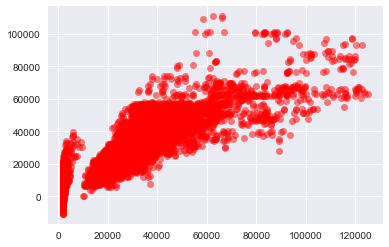

In [36]:
plt.plot(Y,Tabelareg.predict(X),'o',color='red',alpha=0.5)
plt.show()

## Conclusão

   Após todo o processo de análise da divisão de preços, por análise descritiva e modelos de predição o estudo foi capaz de mostrar como era a real influência de 3 variáveis no preço de um carro. As três variáveis escolhidas foram baseadas além de uma análise descritiva, mostrando como era o preço em função destas, mostrado pelos gráficos Price x Ano; Price x Potência e Price x Cilindros e pelo 'HeatMap' (figura 1), capaz de avaliar a correlação entre cada variável. Sendo assim pode-se concluir que as variáveis definidas como Ano, Potência e Cilindros (Número de Cilindros no motor do carro) eram as que apresentavam maior influência sobre o preço de um carro na base de dados do estudo, como mostrado no início deste na seção de mineração de dados e análise descritiva.
   
   Em seguida foi importante analisar entre faixas de preço, onde se dava a maior incidência dos carros, ou seja entre quais preços estava distribuído maior número de carros. A partir disso já era possível concluir o formato de distribuição, observando o gráfico do Histograma, pode-se concluir que há uma assimetria à direita positiva.
   
   A partir dessas conclusões iniciais partiu-se para a montagem de modelos de predição, entre eles: Modelo pela Média, K vizinhos mais próximos e de Regressão Linear. Para isso foi necessário antes dividir a base de dados inicial ('data') em teste e treinamento, e usar a de treinamento para cada um desses modelos. Por fim foi necessário analisar o coeficiente de determinação de cada e seu erro médio quadrático, conhecido por RMS. 
   
   O modelo inicial, de predição pela Média, basicamente mostra que o preço esperado de um carro na base de dados de treinamento é o valor médio dos preços e portanto apresenta uma análise superficial, tanto que seu coeficiente de determinação é 0, e este se mostra eficiente quanto mais próximo de 1.
   
   O modelo de K-vizinhos mais próximos explicado em comentários durante o desenvolvimento do mesmo.
   
   O modelo de Regressão Linear escolhido foi por OLS e consiste em um modelo de regressão múltipla, afinal há 3 variáveis de influência para a variável alvo, o preço do carro. Este se apresenta mais eficiente e pode mostrar graficamente o comportamento entre preço esperado e preço real. Isso porque o modelo apresenta uma equação linear que abrange as 3 variáveis juntamente com seus coeficientes determinados pela tabela OLS (tabela 1) e assim pode-se criar uma lista com todos estes valores e posteriormente o gráfico da Regressão Linear, onde cada ponto representa o valor (Price) estimado quando os parâmetros 'Ano', 'Potência' e 'Cilindros' são levados em consideração para o cálculo


## Referências Bibliográficas

Site do qual retiramos a base de dados: https://www.kaggle.com/jshih7/car-price-prediction?scriptVersionId=584464/data

Estudo sobre o K-Nearest: http://scholarpedia.org/article/K-nearest_neighbor

Estudo sobre a Regressão Linear: http://repositorio.unicamp.br/bitstream/REPOSIP/306421/1/Reynaldo_Cristiane_M.pdf

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py